# Preliminary Visualization of Our Data

## Import our dependencies
This notebook file will be for visualizing our census data, not necessarily for processing it.

The data for both models is taken from the USDA food research atlas.

By visualizing our data, we will be able to determine if K-Means clustering (or DBSCAN) is a viable process to train our current classification model. 

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Load our datasets

In [39]:
atlas_fifteen_path = '../data/raw/Raw_Atlas_2015/Raw_Atlas_Data_2015.xlsx'
fifteen_xl = pd.ExcelFile(atlas_fifteen_path)
atlas_ten_path = '../data/raw/Raw_Atlas_2010/Raw_Atlas_Data_2010.xlsx'
ten_xl = pd.ExcelFile(atlas_ten_path)

atlas_nineteen = pd.read_csv('../data/raw/Raw_Atlas_2019/Raw_Atlas_Data_2019.csv')
atlas_fifteen = fifteen_xl.parse('Food Access Research Atlas')
atlas_ten = ten_xl.parse('Food Access Research Atlas')

In [41]:
atlas_nineteen.head()

,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,1001020100,Alabama,Autauga County,1,1912,693,0,0.0,0.00,0,...,221.0,1622.0,217.0,14.0,0.0,14.0,45.0,44.0,6.0,102.0
1,1001020200,Alabama,Autauga County,1,2170,743,0,181.0,8.34,1,...,214.0,888.0,1217.0,5.0,0.0,5.0,55.0,75.0,89.0,156.0
2,1001020300,Alabama,Autauga County,1,3373,1256,0,0.0,0.00,0,...,439.0,2576.0,647.0,17.0,5.0,11.0,117.0,87.0,99.0,172.0
3,1001020400,Alabama,Autauga County,1,4386,1722,0,0.0,0.00,0,...,904.0,4086.0,193.0,18.0,4.0,11.0,74.0,85.0,21.0,98.0
4,1001020500,Alabama,Autauga County,1,10766,4082,0,181.0,1.68,0,...,1126.0,8666.0,1437.0,296.0,9.0,48.0,310.0,355.0,230.0,339.0


147 columns is a lot! 

We'll be removing most of these in our data processing steps along with simplifying them in our autoencoder, but let's find some simple ways to get an understanding of our data.

In [11]:
atlas_nineteen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72531 entries, 0 to 72530
Columns: 147 entries, CensusTract to TractSNAP
dtypes: float64(126), int64(19), object(2)
memory usage: 81.3+ MB


## Data Visualization (2019)

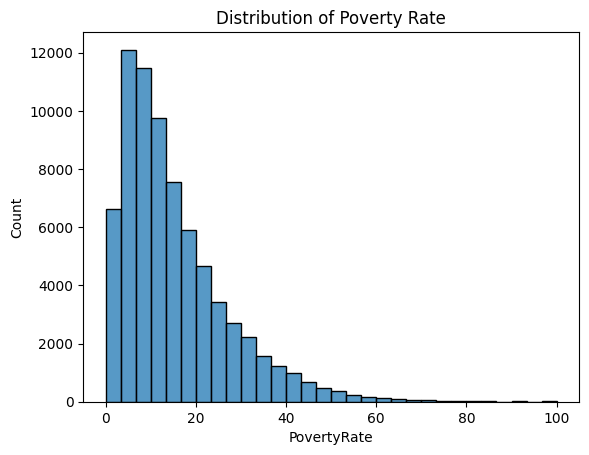

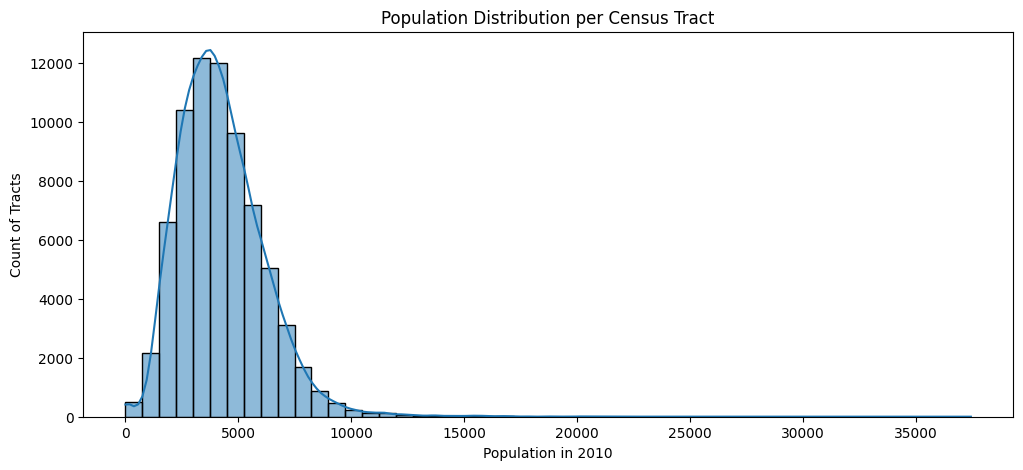

In [28]:
#Poverty Rate Distribution 
sns.histplot(atlas_nineteen['PovertyRate'], bins=30)
plt.title("Distribution of Poverty Rate")
plt.show()
# Population distribution
plt.figure(figsize=(12,5))
sns.histplot(atlas_nineteen['Pop2010'], bins=50, kde=True) # Don't want strings in our dataset!
plt.title("Population Distribution per Census Tract")
plt.xlabel("Population in 2010")
plt.ylabel("Count of Tracts")
plt.show()

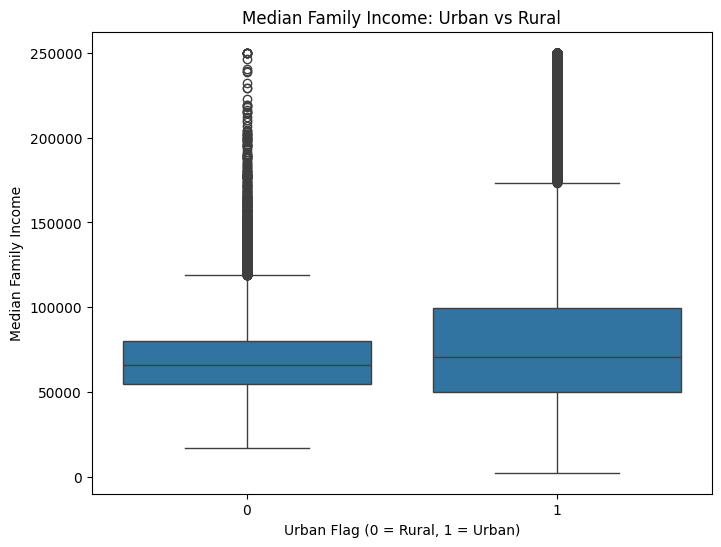

In [19]:
plt.figure(figsize=(8,6))
sns.boxplot(data=atlas_nineteen, x='Urban', y='MedianFamilyIncome')
plt.title("Median Family Income: Urban vs Rural")
plt.xlabel("Urban Flag (0 = Rural, 1 = Urban)")
plt.ylabel("Median Family Income")
plt.show()

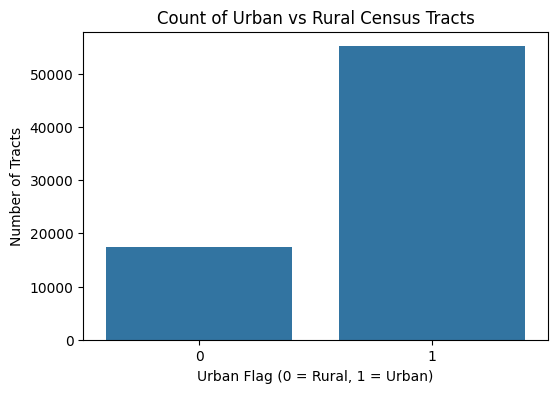

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(data=atlas_nineteen, x='Urban')
plt.title("Count of Urban vs Rural Census Tracts")
plt.xlabel("Urban Flag (0 = Rural, 1 = Urban)")
plt.ylabel("Number of Tracts")
plt.show()


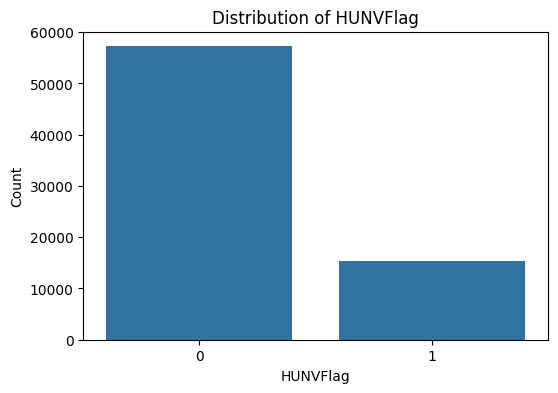

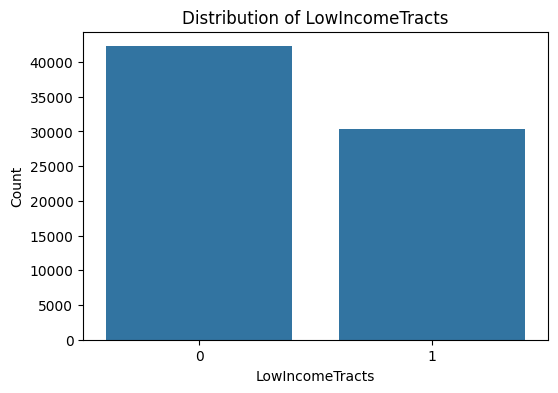

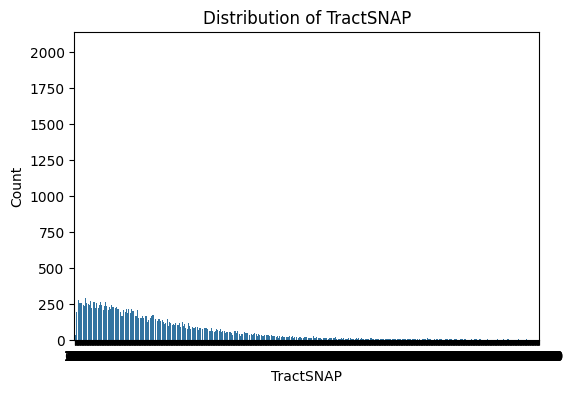

In [23]:
flags = ['HUNVFlag', 'LowIncomeTracts', 'TractSNAP']

for flag in flags:
    plt.figure(figsize=(6,4))
    sns.countplot(data=atlas_nineteen, x=flag)
    plt.title(f"Distribution of {flag}")
    plt.xlabel(flag)
    plt.ylabel("Count")
    plt.show()


/tmp/ipykernel_12678/548147251.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=race_means.index, y=race_means.values, palette='pastel')


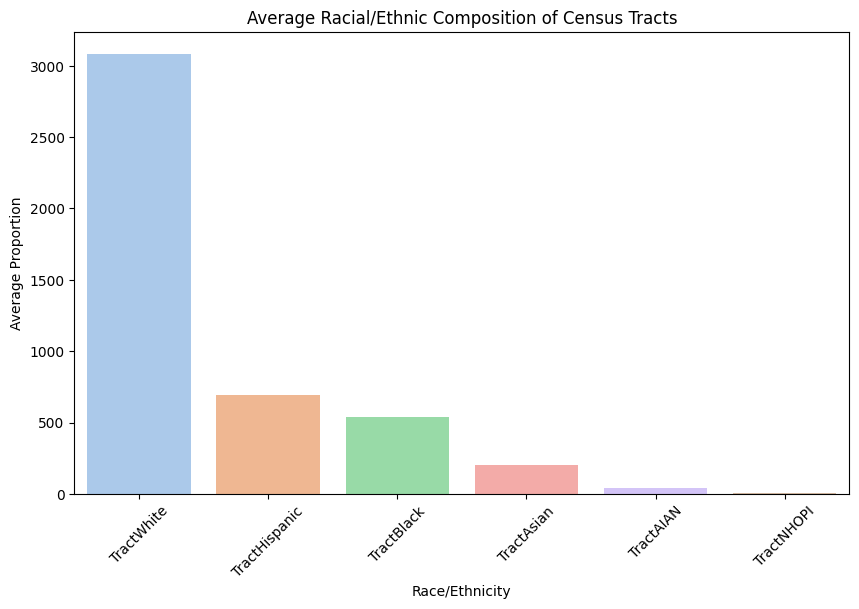

In [27]:
race_cols = ['TractWhite', 'TractBlack', 'TractAsian', 'TractHispanic', 'TractNHOPI', 'TractAIAN']

# Mean racial proportions across all tracts
race_means = atlas_nineteen[race_cols].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=race_means.index, y=race_means.values, palette='pastel')
plt.title("Average Racial/Ethnic Composition of Census Tracts")
plt.ylabel("Average Proportion")
plt.xlabel("Race/Ethnicity")
plt.xticks(rotation=45)
plt.show()


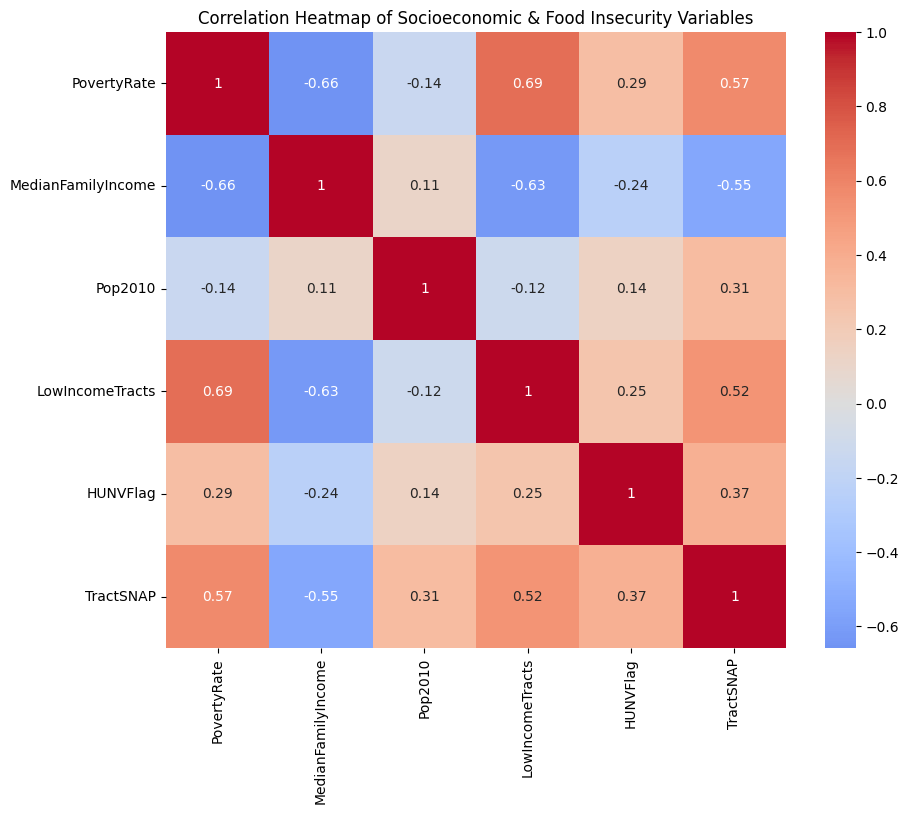

In [29]:
subset_cols = ['PovertyRate', 'MedianFamilyIncome', 'Pop2010', 'LowIncomeTracts', 'HUNVFlag', 'TractSNAP']

plt.figure(figsize=(10,8))
sns.heatmap(atlas_nineteen[subset_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Socioeconomic & Food Insecurity Variables")
plt.show()

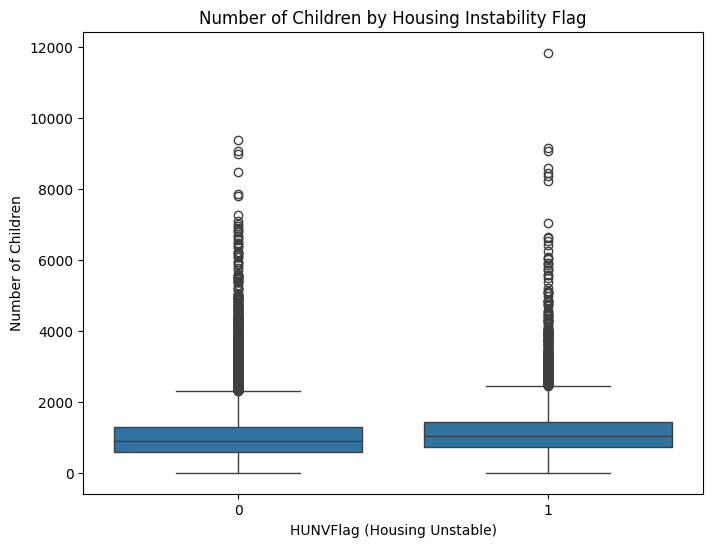

In [31]:
plt.figure(figsize=(8,6))
sns.boxplot(data=atlas_nineteen, x='HUNVFlag', y='TractKids')
plt.title("Number of Children by Housing Instability Flag")
plt.xlabel("HUNVFlag (Housing Unstable)")
plt.ylabel("Number of Children")
plt.show()

## Visualization of trends

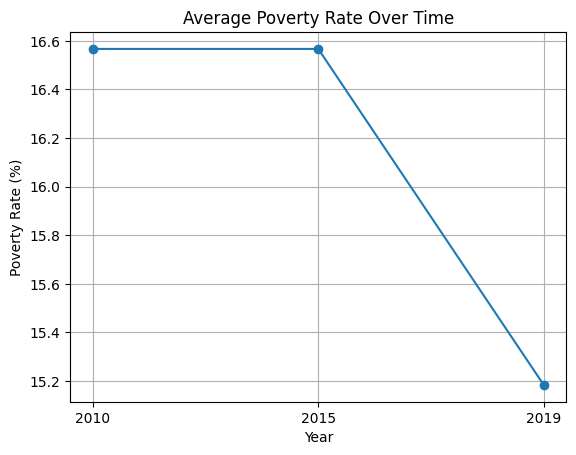

In [43]:
years = ['2010', '2015', '2019']
avg_2019_pov = atlas_nineteen["PovertyRate"].mean()
avg_2015_pov = atlas_fifteen["PovertyRate"].mean()
avg_2010_pov = atlas_ten["PovertyRate"].mean()

poverty = [avg_2010_pov, avg_2015_pov, avg_2019_pov]
plt.plot(years, poverty, marker='o')
plt.title("Average Poverty Rate Over Time")
plt.ylabel("Poverty Rate (%)")
plt.xlabel("Year")
plt.grid(True)
plt.show()

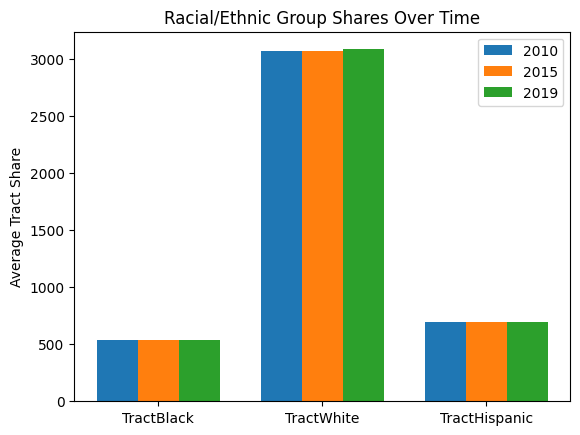

In [45]:
labels = ['TractBlack', 'TractWhite', 'TractHispanic']

values_2010 = [atlas_ten["TractBlack"].mean(), atlas_ten["TractWhite"].mean(), atlas_ten["TractHispanic"].mean()]
values_2015 = [atlas_fifteen["TractBlack"].mean(), atlas_fifteen["TractWhite"].mean(), atlas_fifteen["TractHispanic"].mean()]
values_2019 = [atlas_nineteen["TractBlack"].mean(), atlas_nineteen["TractWhite"].mean(), atlas_nineteen["TractHispanic"].mean()]

x = np.arange(len(labels))
width = 0.25

plt.bar(x - width, values_2010, width, label='2010')
plt.bar(x, values_2015, width, label='2015')
plt.bar(x + width, values_2019, width, label='2019')

plt.ylabel('Average Tract Share')
plt.title('Racial/Ethnic Group Shares Over Time')
plt.xticks(x, labels)
plt.legend()
plt.show()

# Conclusions from initial visualization

## 1. Urban–Rural Economic Disparities

    Evidence: Boxplots of MedianFamilyIncome by Urban flag revealed a noticeably higher median income and less variance in urban tracts compared to rural ones. This shows that urban areas are generally wealthier, but rural tracts may have more extreme outliers (very high or very low incomes), suggesting greater internal inequality.

## 2. Rural Underrepresentation on a National Level

    The dataset shows that urban tracts greatly outnumber rural ones, which means most patterns reflect urban areas. This imbalance could hide rural-specific trends, so it’s important to analyze urban and rural tracts separately when studying food insecurity or income data.

## 3. Rural Housing Instability

    While urban tracts are more numerous, rural areas show a higher distribution of housing instability (HUNVFlag) and low-income tract status. This suggests that rural communities face disproportionately higher levels of food insecurity risk, despite being underrepresented in the dataset.

## 4. Racial Overrepresentation of White Tracts

    Census tract data shows that White populations outnumber both Hispanic and Black populations by nearly 6 times, on average. This highlights a significant demographic imbalance that must be considered when analyzing food insecurity, as smaller populations may face challenges that are masked by majority-group trends.